# Whitening Characteristics of the Mahalanobis Distance

[Mahalanobis distance](http://en.wikipedia.org/wiki/Mahalanobis_distance) is
a metric used to compare a vector to a multivariate normal distribution with a
given mean vector ($\boldsymbol{\mu}$) and covariance matrix
($\boldsymbol{\Sigma}$). It is often used to detect statistical outliers
(e.g., in the RX anomaly detector) and also appears in the exponential term
of the probability density function for the multivariate normal distribution.
Here, we'll show how Mahalanobis distance is equivalent to Euclidean distance
measured in the whitened space of the distribution.

First, let's start with the equation defining Mahalanobis distance:

$$d_{M}^2(\mathbf{x})=(\mathbf{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})$$

We'll start by expressing $\boldsymbol{\Sigma}^{-1}$ in terms of its matrix-multiplied
square root. Note that the matrix square root doesn't mean the matrix whose
elements are the square roots of the elements of $\boldsymbol{\Sigma}^{-1}$;
rather, it is the matrix which, when matrix-multiplied by itself, will give
$\boldsymbol{\Sigma}^{-1}$. So for some square matrix $\mathbf{A}$, matrix $\mathbf{B}$
is a square root of $\mathbf{A}$ if $\mathbf{B} \mathbf{B} = \mathbf{A}$. The
matrix square root can be computed multiple ways. For our case, where we are
dealing with symmetric covariance matrices, we will use the following function,
which uses an eigendecomposition of the covariance matrix (or its inverse).

In [1]:
import numpy as np
def msqrt(X):
    '''Computes the square root matrix of symmetric square matrix X.'''
    (L, V) = np.linalg.eig(X)
    return V.dot(np.diag(np.sqrt(L))).dot(V.T) 

Let's test it by showing that the function works for an example covariance
matrix ($\mathbf{C}$):

In [2]:
C = np.array([[12., 2.],
              [2., 1.]])

In [3]:
SX = msqrt(C)
print SX

[[ 3.4330164   0.46303177]
 [ 0.46303177  0.88634169]]


And now to verify that this matrix is indeed a square root of `C`:

In [4]:
print SX.dot(SX)

[[ 12.   2.]
 [  2.   1.]]


We will denote the square root of $\boldsymbol{\Sigma}$ as $\boldsymbol{\Sigma}^{\frac{1}{2}}$
and the square root of $\boldsymbol{\Sigma}^{-1}$ as
$\boldsymbol{\Sigma}^{-\frac{1}{2}}$. A couple properties of the matrix square
root are worth mentioning:

1. A matrix square root is symmetric.

2. $\boldsymbol{\Sigma}^{-\frac{1}{2}} = \left( \boldsymbol{\Sigma}^{\frac{1}{2}} \right)^{-1}$

Next, let's substitute the square root into the Mahalanobis distance formula
and use the fact that the square root matrix is also symmetric to simplify
the formula.

$$
\begin{align*}
d_{M}^2(\mathbf{x}) & = (\mathbf{x}-\boldsymbol{\mu})^{T} \left[ \boldsymbol{\Sigma}^{-\frac{1}{2}} \boldsymbol{\Sigma}^{-\frac{1}{2}} \right] (\mathbf{x}-\boldsymbol{\mu}) \\
& =  \left[ (\mathbf{x}-\boldsymbol{\mu})^{T} \boldsymbol{\Sigma}^{-\frac{1}{2}} \right] \left[ \boldsymbol{\Sigma}^{-\frac{1}{2}} (\mathbf{x}-\boldsymbol{\mu}) \right] \\
& =  \left[ \boldsymbol{\Sigma}^{-\frac{1}{2}} (\mathbf{x}-\boldsymbol{\mu}) \right]^{T} \left[ \boldsymbol{\Sigma}^{-\frac{1}{2}} (\mathbf{x}-\boldsymbol{\mu}) \right] \\
& = \mathbf{y}^{T}\mathbf{y} \\
& = \lVert \mathbf{y} \rVert
\end{align*}
$$

The equations above show that the Mahalanobis distance can be represented as
the magnitude of a vector ($\mathbf{y}$) relative to the distribution mean.

Next, let's consider the covariance of $\mathbf{y}$. If a random vector
$\mathbf{x}$ has covariance $\boldsymbol{\Sigma}$, then a linear transformation
of the form $\mathbf{A}\mathbf{x}$ or $\mathbf{A} \left( \mathbf{x} - \boldsymbol{\mu} \right)$
will have covariance $\mathbf{A}\boldsymbol{\Sigma}\mathbf{A}^T$. In
our case $\mathbf{A}=\boldsymbol{\Sigma}^{-\frac{1}{2}}$ so the covariance of
$\mathbf{y}$ is then equal to

$$
\begin{align*}
\boldsymbol{\Sigma}_y & = \mathbf{A} \boldsymbol{\Sigma} \mathbf{A}^T \\
& = \boldsymbol{\Sigma}^{-\frac{1}{2}} \boldsymbol{\Sigma} \left( \boldsymbol{\Sigma}^{-\frac{1}{2}}\right)^T \\
& = \boldsymbol{\Sigma}^{-\frac{1}{2}} \left( \boldsymbol{\Sigma}^{\frac{1}{2}} \boldsymbol{\Sigma}^{\frac{1}{2}} \right) \boldsymbol{\Sigma}^{-\frac{1}{2}} \\
& = \left( \boldsymbol{\Sigma}^{-\frac{1}{2}} \boldsymbol{\Sigma}^{\frac{1}{2}} \right) \left( \boldsymbol{\Sigma}^{\frac{1}{2}} \boldsymbol{\Sigma}^{-\frac{1}{2}} \right) \\
& = \left( \mathbf{I} \right) \left( \mathbf{I} \right) \\
& = \mathbf{I}
\end{align*}
$$

So not only is the Mahalanobis distance equivalent to the magnitude of a
displacement relative to the background mean, the transformed vector $\mathbf{y}$
also has unit variance in all directions (its covariance is whitened and normalized).
To demonstrate this with some sample data, let's generate a set of sample
points drawn from a bivariate normal distribution whose mean is at the origin
and with covariance $\mathbf{C}$ (as defined above). Let's also consider two
specific points in the vicinity of this distribution.

In [5]:
X = np.random.multivariate_normal([0, 0], C, 20000).T
p1 = (0, -2)
p2 = (5, 1)

Next, we'll plot these samples and highlight the displacements (distances) of
the two points from the centroid (mean) of the distribution.

In [6]:
%matplotlib inline
def plot_points(X, p1, p2):
    import matplotlib.pyplot as plt
    f = plt.figure(figsize=(10, 10))
    plt.plot(X[0, :], X[1, :], 'k.', ms=1)
    plt.hold(1)
    plt.grid(1)
    for (p, color) in [(p1, 'green'), (p2, 'red')]:
        plt.plot(p[0], p[1], color[0] + '.', ms=6)
        aprops = {'width': 0.5, 'headwidth': 5, 'color': color,
                  'shrink': 0.0}
        plt.annotate('', p, (0, 0), arrowprops=aprops)
        print 'd({}) = {:.3f}'.format(color, np.linalg.norm(p))
    ax = plt.gca()
    ax.set_aspect('equal')

d(green) = 2.000
d(red) = 5.099


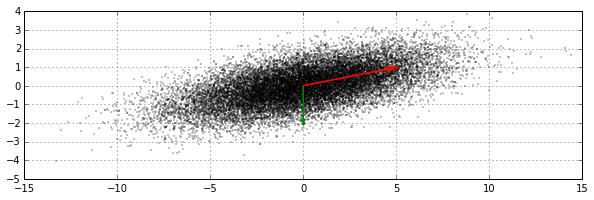

In [7]:
plot_points(X, p1, p2)

In the plot above, it is clear that there is significantly greater variance
in the $x$ direction and it is also apparent that there is a correlation
between the $x$ and $y$ values. Note that the point highlighted in green is
clearly closer to the centroid of the distribution than the red point. Next,
we'll plot the same data after applying the whitening transform.

d(green) = 2.449
d(red) = 1.458


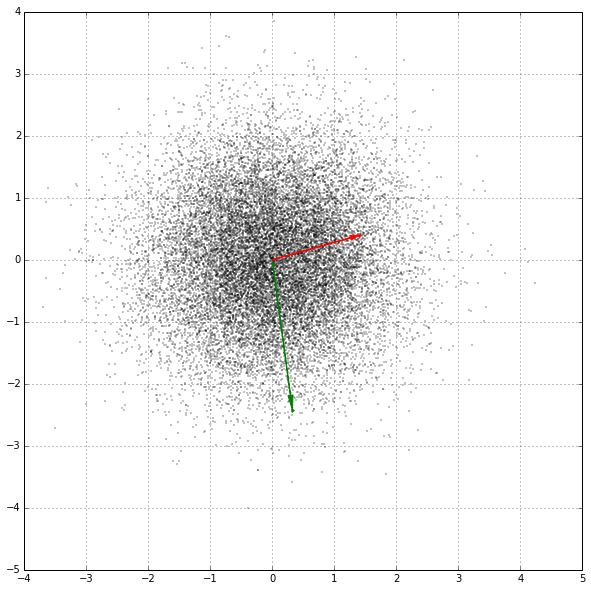

In [8]:
M = msqrt(np.linalg.inv(C))
plot_points(M.dot(X), M.dot(p1), M.dot(p2))

In the whitened coordinate space plotted above, there is no longer a
correlation between the $x$ and $y$ values. It is clear from the plot that
the point indicated by the green arrow, which was much closer to the
background mean in the original coordinate space, is significantly farther
from the mean than the red point after the whitening transform is applied.

If we compute the covariance of the sample data in the whitened space, we
shouldn't expect the result to be exactly equal to the identity matrix, since
it is computed from a finite number of samples. But we should get something
close:

In [10]:
print np.cov(M.dot(X))

[[ 0.99723658  0.00859287]
 [ 0.00859287  1.00567272]]


To summarize, Mahalanobis distance performs an implicit linear transformation
of the original coordinate space that whitens and normalizes the covariance.
This whitening can be performed explicitly by pre-multiplying a vector by
$\boldsymbol{\Sigma}^{-\frac{1}{2}}$ after subtracting the background mean.
In addition to the Mahalanobis distance, this whitening transformation is used
in a number of other applications, such as the the linear matched filter and
the Minimum Noise Fraction (Noise-Adjusted Principal Components).